In [1]:
#https://www.analyticsvidhya.com/blog/2015/06/solution-kaggle-competition-bike-sharing-demand/
#https://www.kaggle.com/c/bike-sharing-demand
#https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile
#https://www.canva.com/learn/brand-color-palette/

In [4]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import os;
import seaborn as sns;
import datetime;
%matplotlib inline

# <font color='#00281F'>1. Reading Files</font>

In [29]:
folderPath = 'D:/Rep/MyLearning/articles/24Tutorials/12_BikeSharing';

In [30]:
trainFileName = 'train.csv'
trainFilePath = os.path.join(folderPath,trainFileName)
testFileName = 'test.csv';
testFilePath = os.path.join(folderPath,testFileName);

In [31]:
train = pd.read_csv(trainFilePath);
test = pd.read_csv(testFilePath)
data = pd.concat([train,test])

In [32]:
data = data[['datetime','season','weather','workingday','holiday','temp','atemp','windspeed','humidity','casual','registered','count']]

In [33]:
data['season'] = data['season'].replace(1,'spring')
data['season'] = data['season'].replace(2,'summer')
data['season'] = data['season'].replace(3,'fall')
data['season'] = data['season'].replace(4,'winter')
train['season'] = train['season'].replace(1,'spring')
train['season'] = train['season'].replace(2,'summer')
train['season'] = train['season'].replace(3,'fall')
train['season'] = train['season'].replace(4,'winter')

In [34]:
data['weather'] = data['weather'].replace(1,'clear')
data['weather'] = data['weather'].replace(2,'cloudy')
data['weather'] = data['weather'].replace(3,'lightRain')
data['weather'] = data['weather'].replace(4,'HeavyRain')
train['weather'] = train['weather'].replace(1,'clear')
train['weather'] = train['weather'].replace(2,'cloudy')
train['weather'] = train['weather'].replace(3,'lightRain')
train['weather'] = train['weather'].replace(4,'HeavyRain')

In [35]:
data['datetime'] = pd.to_datetime(data['datetime'],format='%Y-%m-%d %H:%M:%S')
data['season'] = data['season'].astype('category')
data['weather'] = data['weather'].astype('category')
data['workingday'] = data['workingday'].astype(np.uint8)
data['holiday'] = data['holiday'].astype(np.uint8)
data['temp'] = data['temp'].astype(np.float32)
data['atemp'] = data['atemp'].astype(np.float32)
data['windspeed'] = data['windspeed'].astype(np.float32)
data['humidity'] = data['humidity'].astype(np.uint8)
#data['casual'] = data['casual'].astype(np.uint16)
#data['registered'] = data['registered'].astype(np.uint16)
#data['count'] = data['count'].astype(np.uint16)

In [36]:
train['datetime'] = pd.to_datetime(train['datetime'],format='%Y-%m-%d %H:%M:%S')
train['season'] = train['season'].astype('category')
train['weather'] = train['weather'].astype('category')
train['workingday'] = train['workingday'].astype(np.uint8)
train['holiday'] = train['holiday'].astype(np.uint8)
train['temp'] = train['temp'].astype(np.float32)
train['atemp'] = train['atemp'].astype(np.float32)
train['windspeed'] = train['windspeed'].astype(np.float32)
train['humidity'] = train['humidity'].astype(np.uint8)
train['casual'] = train['casual'].astype(np.uint16)
train['registered'] = train['registered'].astype(np.uint16)
train['count'] = train['count'].astype(np.uint16)

In [37]:
train['hour'] = train['datetime'].apply(lambda x:x.hour)
train['weekday'] = train['datetime'].apply(lambda x:x.weekday())
train['month'] = train['datetime'].apply(lambda x:x.month)
train['year'] = train['datetime'].apply(lambda x:x.year)
data['hour'] = data['datetime'].apply(lambda x:x.hour)
data['weekday'] = data['datetime'].apply(lambda x:x.weekday())
data['month'] = data['datetime'].apply(lambda x:x.month)
data['year'] = data['datetime'].apply(lambda x:x.year)

# <font color='#00281F'>2. Data Exploration</font> 

In [18]:
data.dtypes

datetime      datetime64[ns]
season              category
weather             category
workingday             uint8
holiday                uint8
temp                 float32
atemp                float32
windspeed            float32
humidity               uint8
casual               float64
registered           float64
count                float64
hour                   int64
weekday                int64
month                  int64
year                   int64
dp_reg                 int64
yp_gp                  int64
dtype: object

In [12]:
print(data.groupby('weather')['datetime'].nunique())
print('-------------------------------------------')
print(data.groupby('season')['datetime'].nunique())

weather
HeavyRain        3
clear        11413
cloudy        4544
lightRain     1419
Name: datetime, dtype: int64
-------------------------------------------
season
fall      4496
spring    4242
summer    4409
winter    4232
Name: datetime, dtype: int64


In [12]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.230619,23.655096,61.886460,12.799149,36.021955,155.552177,191.574132
std,0.166599,0.466159,7.791600,8.474654,19.245033,8.164592,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000


In [13]:
data.apply(lambda x:sum(x.isna()))

datetime         0
season           0
weather          0
workingday       0
holiday          0
temp             0
atemp            0
windspeed        0
humidity         0
casual        6493
registered    6493
count         6493
dtype: int64

### <font color='#037367'>1. Effect of season and weather</font>

weather  HeavyRain       clear      cloudy   lightRain
season                                                
fall           NaN  243.583420  230.771523  156.582915
spring       164.0  126.781694  106.861538   61.227488
summer         NaN  236.729595  189.515537  123.906250
winter         NaN  209.511163  194.784387  134.466667


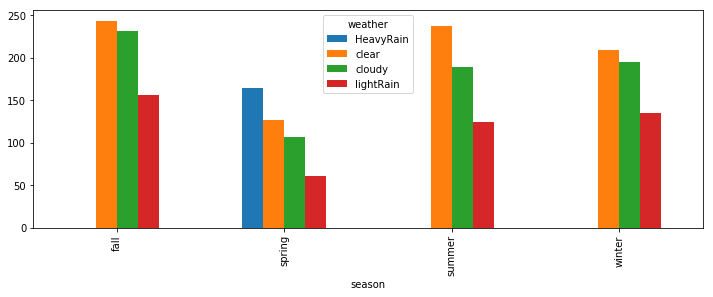

In [10]:
temp1 = train.pivot_table(values='count',index='season',columns='weather')
print(temp1)
temp1.plot(kind='bar',figsize=(12,4))

weather  HeavyRain      clear     cloudy  lightRain
season                                             
fall           NaN  54.972539  49.783113  32.924623
spring         6.0  17.649801  13.718881   3.526066
summer         NaN  53.128262  41.491525  20.589286
winter         NaN  33.532902  22.294919  13.666667


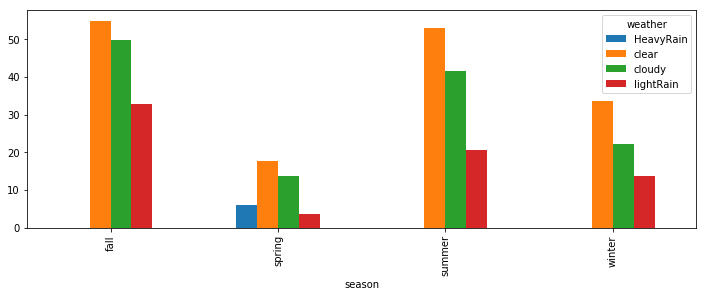

In [11]:
temp1 = train.pivot_table(values='casual',index='season',columns='weather')
print(temp1)
temp1.plot(kind='bar',figsize=(12,4))

<font color='#7B895B'>
1. Heavy rains occured only during spring <br/>
2. Bike demand during clear skys is comparable during fall and summer <br/>
3. during clear skys summar == fall > winter > spring <br/>
4. During cloudy skys fall > winter > summer > spring <br/>
5. During Light Rain  fall > winter > summer > spring <br/>
6. Demand of casual rides is very less during spring in comparison to other season <br/>
</font>

### <font color='#037367'>2. Effect of Humidity and wind speed</font>

Text(0.5,1,'For Heavy Rain Weather')

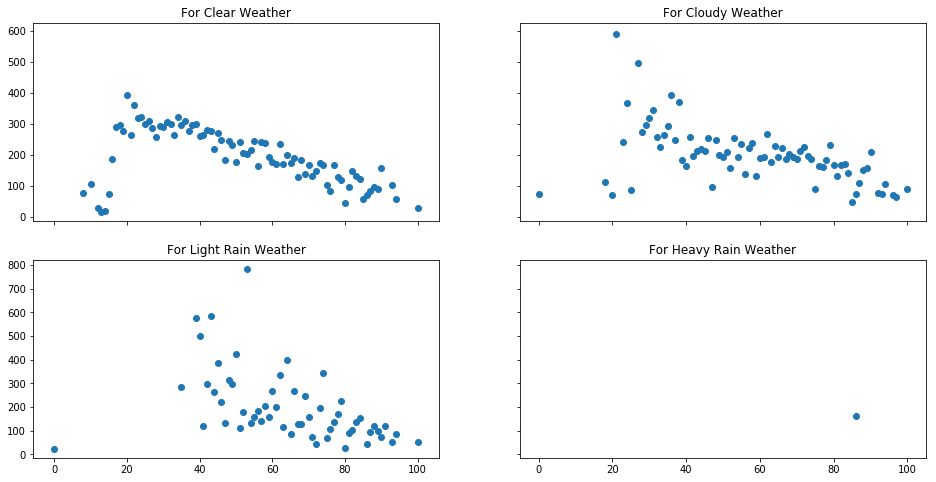

In [12]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(16,8))
queryFilter = (train['weather']=='clear')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax1.scatter(result['humidity'], result['count']) 
ax1.set_title('For Clear Weather')


queryFilter = (train['weather']=='cloudy')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax2.scatter(result['humidity'], result['count'])
ax2.set_title('For Cloudy Weather')

queryFilter = (train['weather']=='lightRain')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax3.scatter(result['humidity'], result['count'])
ax3.set_title('For Light Rain Weather')

queryFilter = (train['weather']=='HeavyRain')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax4.scatter(result['humidity'], result['count'])
ax4.set_title('For Heavy Rain Weather')

Text(0.5,1,'For Winter season')

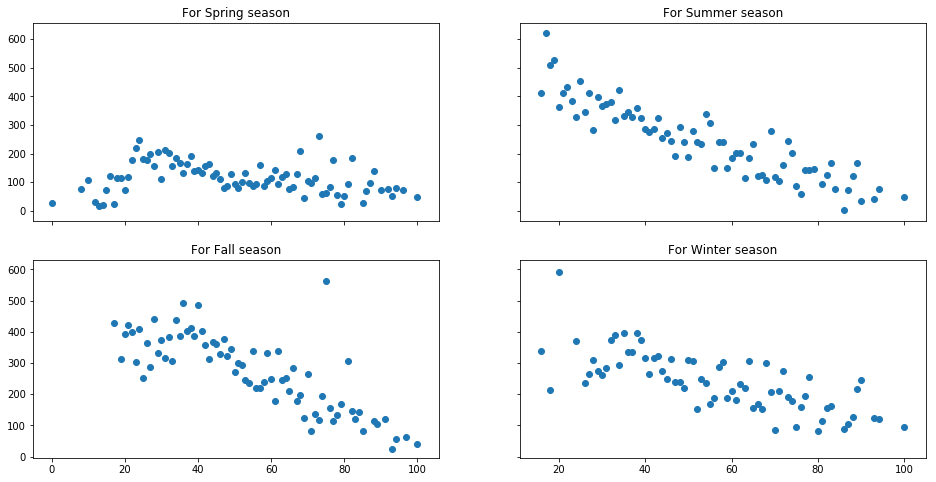

In [13]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(16,8))
queryFilter = (train['season']=='spring')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax1.scatter(result['humidity'], result['count']) 
ax1.set_title('For Spring season')


queryFilter = (train['season']=='summer')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax2.scatter(result['humidity'], result['count'])
ax2.set_title('For Summer season')

queryFilter = (train['season']=='fall')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax3.scatter(result['humidity'], result['count'])
ax3.set_title('For Fall season')

queryFilter = (train['season']=='winter')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax4.scatter(result['humidity'], result['count'])
ax4.set_title('For Winter season')

<font color='#7B895B'>
1. Generally with increase in humidity, the number of bike sharing decreases. <br/>
2. In Spring and winter season, humidity has no/little effect of bike demand <br/>
3. During Summer season when humidity is low, bike demand remains very high <br/>
4. There is an outlier where weather is light rain but humidity is 0 <br/>
5. For Light rain weather bike demand remains very high when humidity is in between 40 to 60 <br/>
</font>

### <font color='#037367'>3. Effect of Holiday and Working days</font>

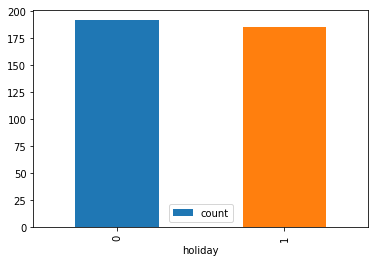

In [14]:
train.groupby(by='holiday').agg({'count':'mean','holiday':'first'}).plot(kind='bar',x='holiday',y='count')

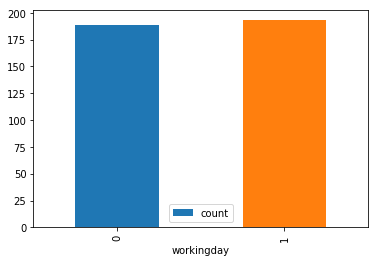

In [15]:
train.groupby(by='workingday').agg({'count':'mean','workingday':'first'}).plot(kind='bar',x='workingday',y='count')

In [16]:
train.pivot_table(values='count',index='holiday',columns='workingday')

workingday,0,1
holiday,,
0,188.765096,193.011873
1,185.877814,NaN


<font color='#7B895B'>
1. Generally on working days the demand for cycles is more <br/>
2. When there is holiday, than demand becomes less <br/>
</font>

### <font color='#037367'>3. Exploring Datetime column</font>

Text(0.5,1,'Casual Bike demand per hour')

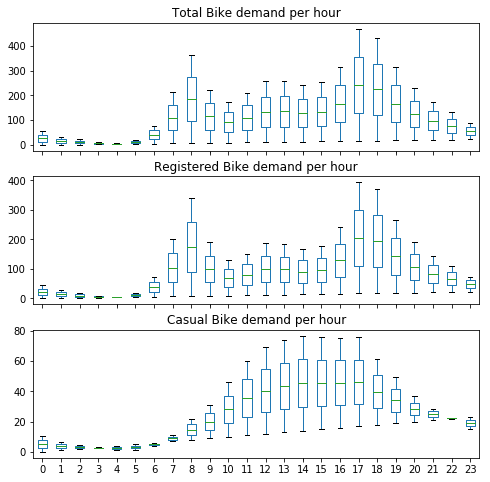

In [59]:
hourgroupby = train.groupby('hour').agg({'count':'mean','registered':'mean','casual':'mean','hour':'first'})

f, axes = plt.subplots(3,1,figsize=(8,8),sharex=True)
hourgroupby[['hour','count']].T.plot(kind='box',by='hour',ax=axes[0])
axes[0].set_title('Total Bike demand per hour')
hourgroupby[['hour','registered']].T.plot(kind='box',by='hour',ax=axes[1])
axes[1].set_title('Registered Bike demand per hour')
hourgroupby[['hour','casual']].T.plot(kind='box',by='hour',ax=axes[2])
axes[2].set_title('Casual Bike demand per hour')

<font color='#7B895B'>
1. For casual rides the demand is high between 10 a.m. to 19. <br/>
2. For Registered rides the demand is high between 7 to 9 and 16 to 19. <br/>
3. The demand of casual rides is higher than registered between 10 to 16 <br/>
4. The demand of causal immediately picks up after 20 till 23 during spring <br/>
5. Light Rain weather has also the same effect on casual rides where demand increases during 20 till 24 <br/>
6. For Weekends Registered bike demand shows similar distribution as that of causal users for hourly bike demand. <br/>
</font>

Text(0.5,1,'Casual Bike demand by day of week')

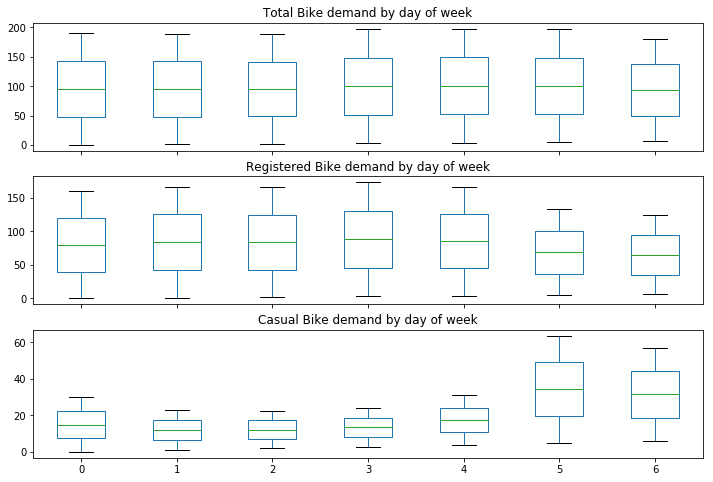

In [37]:
weekdaygroupby = train.groupby('weekday').agg({'count':'mean','registered':'mean','casual':'mean','weekday':'first'})

f, axes = plt.subplots(3,1,figsize=(12,8),sharex=True)
weekdaygroupby[['weekday','count']].T.plot(kind='box',by='weekday',ax=axes[0])
axes[0].set_title('Total Bike demand by day of week')
weekdaygroupby[['weekday','registered']].T.plot(kind='box',by='weekday',ax=axes[1])
axes[1].set_title('Registered Bike demand by day of week')
weekdaygroupby[['weekday','casual']].T.plot(kind='box',by='weekday',ax=axes[2])
axes[2].set_title('Casual Bike demand by day of week')

<font color='#7B895B'>
1. Demand of registered bikes remains high during working days while remains a bit low on weekends <br/>
2. Demand of causual bikes remains high on weekends while it remains a bit low on weekdays <br/>
3. Weather or season doesn't look to have any effect on Bike demand for day of week distribution <br/>
</font>

       month       count     casual  registered
month                                          
1          1   90.366516   8.203620   82.162896
2          2  110.003330  10.318535   99.684795
3          3  148.169811  27.809101  120.360710
4          4  184.160616  43.798680  140.361936
5          5  219.459430  45.268640  174.190789
6          6  242.031798  53.260965  188.770833
7          7  235.325658  55.862939  179.462719
8          8  234.118421  50.296053  183.822368
9          9  233.805281  50.496150  183.309131
10        10  227.699232  41.807903  185.891328
11        11  193.677278  27.829857  165.847420
12        12  175.614035  16.118421  159.495614


Text(0.5,1,'Casual Bike demand by month')

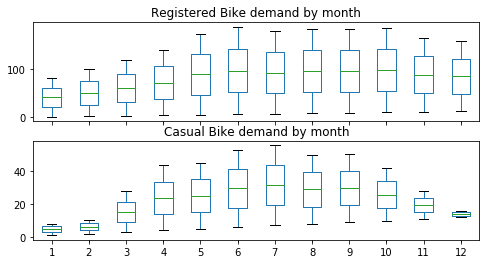

In [64]:
monthgroupby = train.groupby('month').agg({'count':'mean','registered':'mean','casual':'mean','month':'first'})
print(monthgroupby)
f, axes = plt.subplots(2,1,figsize=(8,4),sharex=True)
monthgroupby[['month','registered']].T.plot(kind='box',by='month',ax=axes[0])
axes[0].set_title('Registered Bike demand by month')
monthgroupby[['month','casual']].T.plot(kind='box',by='month',ax=axes[1])
axes[1].set_title('Casual Bike demand by month')

      year       count    casual  registered
year                                        
2011  2011  144.223349  28.73792  115.485430
2012  2012  238.560944  43.25000  195.310944


Text(0.5,1,'Casual Bike demand by year')

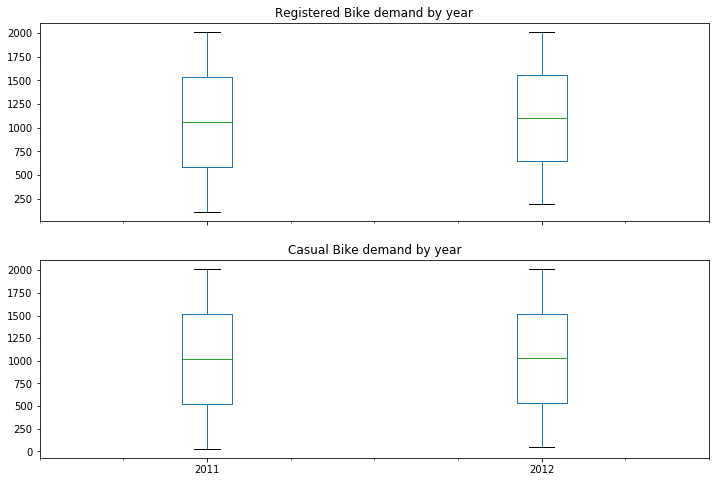

In [65]:
yeargroupby = train.groupby('year').agg({'count':'mean','registered':'mean','casual':'mean','year':'first'})
print(yeargroupby)
f, axes = plt.subplots(2,1,figsize=(12,8),sharex=True)
yeargroupby[['year','registered']].T.plot(kind='box',by='year',ax=axes[0])
axes[0].set_title('Registered Bike demand by year')
yeargroupby[['year','casual']].T.plot(kind='box',by='year',ax=axes[1])
axes[1].set_title('Casual Bike demand by year')

<font color='#7B895B'>
1. Bike demand remain very high during the months of May to October for registered user <br/>
2. Bike demand remains comparable for months of November, December and April for registered users <br/>
3. For Causual users the demand remains high between April to October with peak in July <br/>
4. For Causual users the demand is negligible between months of December to Febrary <br/>
5. Bike demand almost picked up by 75% in 2012 as compared to 2012 for both types of users <br/>
</font>

### <font color='#037367'>4. Distribution of various columns</font>

### <font color='#037367'>5. Classifing Registered users using decision tree </font>

In [14]:
train['hour'] = train['hour'].astype(np.int16)

In [68]:
import graphviz;
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=6)
clf = clf.fit(train[['hour']], train['registered'])

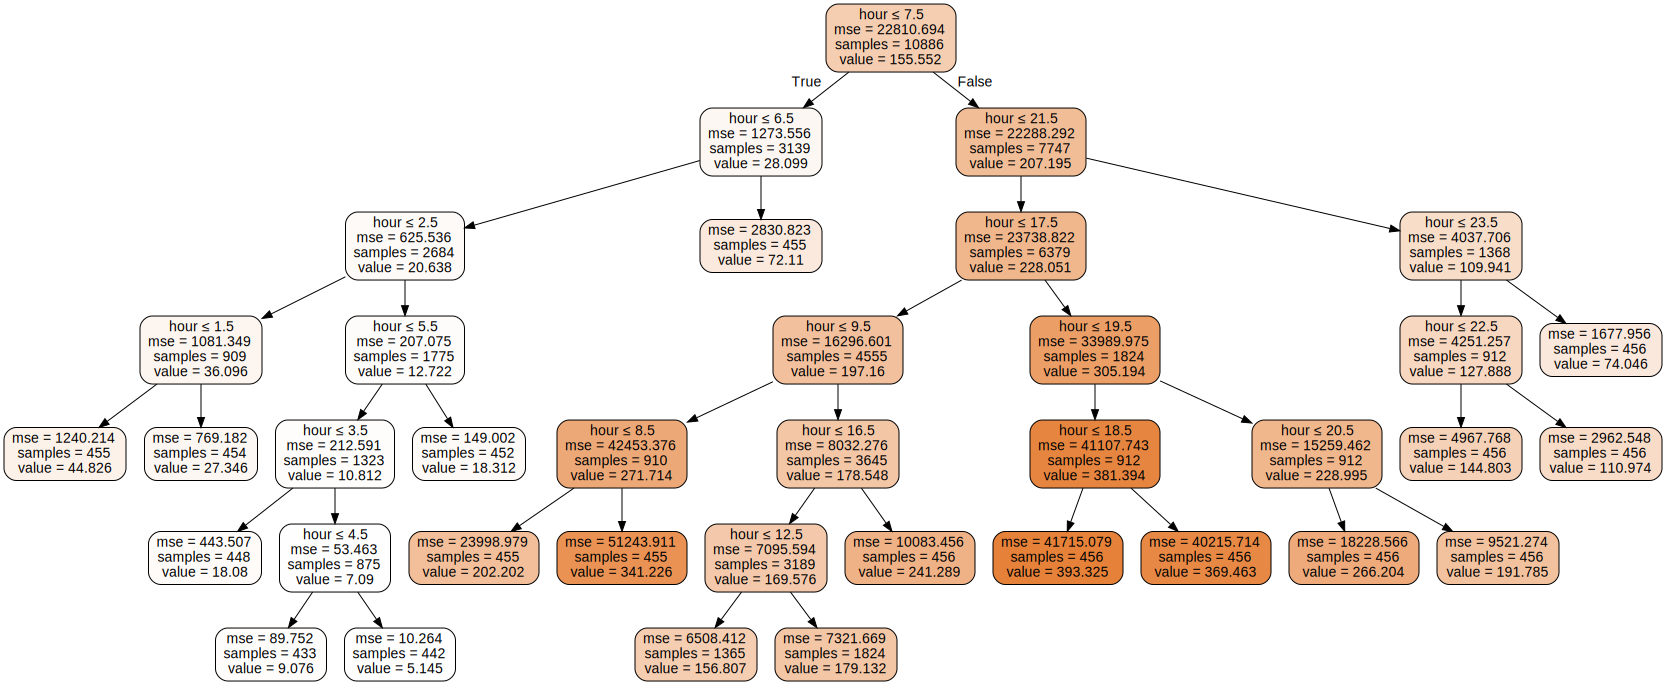

In [69]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=train[['hour']].columns,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data)
graph 

# <font color='#00281F'>3. Data Cleaning and Missing value treatment</font> 

# <font color='#00281F'>4. Feature Engineering</font> 

In [38]:
train['hour'] = train['hour'] + 1;
data['hour'] = data['hour'] + 1;

In [39]:
train['dp_reg'] = 0;
train.loc[train['hour']<8,'dp_reg'] = 1
train.loc[train['hour']>21,'dp_reg'] = 2
train.loc[(train['hour']>8) & (train['hour']<19),'dp_reg'] = 3
train.loc[train['hour']==8,'dp_reg'] = 4
train.loc[train['hour']==9,'dp_reg'] = 5
train.loc[(train['hour']==20) & (train['hour']==21),'dp_reg'] = 6
train.loc[(train['hour']==18) & (train['hour']==19),'dp_reg'] = 7

data['dp_reg'] = 0;
data.loc[data['hour']<8,'dp_reg'] = 1
data.loc[data['hour']>21,'dp_reg'] = 2
data.loc[(data['hour']>8) & (data['hour']<19),'dp_reg'] = 3
data.loc[data['hour']==8,'dp_reg'] = 4
data.loc[data['hour']==9,'dp_reg'] = 5
data.loc[(data['hour']==20) & (data['hour']==21),'dp_reg'] = 6
data.loc[(data['hour']==18) & (data['hour']==19),'dp_reg'] = 7

In [40]:
train['yp_gp'] = 0;
train.loc[train['year']==2011,'yp_gp'] = 1
train.loc[(train['year']==2011) & (train['month']>3),'yp_gp'] = 2
train.loc[(train['year']==2011) & (train['month']>6),'yp_gp'] = 3
train.loc[(train['year']==2011) & (train['month']>9),'yp_gp'] = 4
train.loc[train['year']==2012,'yp_gp'] = 5
train.loc[(train['year']==2012) & (train['month']>3),'yp_gp'] = 6
train.loc[(train['year']==2012) & (train['month']>6),'yp_gp'] = 7
train.loc[(train['year']==2012) & (train['month']>9),'yp_gp'] = 8

data['yp_gp'] = 0;
data.loc[data['year']==2011,'yp_gp'] = 1
data.loc[(data['year']==2011) & (data['month']>3),'yp_gp'] = 2
data.loc[(data['year']==2011) & (data['month']>6),'yp_gp'] = 3
data.loc[(data['year']==2011) & (data['month']>9),'yp_gp'] = 4
data.loc[data['year']==2012,'yp_gp'] = 5
data.loc[(data['year']==2012) & (data['month']>3),'yp_gp'] = 6
data.loc[(data['year']==2012) & (data['month']>6),'yp_gp'] = 7
data.loc[(data['year']==2012) & (data['month']>9),'yp_gp'] = 8

In [41]:
train['day_type'] = 'workingday';
train.loc[(train['holiday']==0) & (train['workingday']==0),'day_type'] = "weekend"
train.loc[(train['holiday']==1),'day_type'] = 'holiday'
train.loc[(train['holiday']==0) & (train['workingday']==1),'day_type'] = 'workingday';

data['day_type'] = 'workingday';
data.loc[(data['holiday']==0) & (data['workingday']==0),'day_type'] = "weekend"
data.loc[(data['holiday']==1),'day_type'] = 'holiday'
data.loc[(data['holiday']==0) & (data['workingday']==1),'day_type'] = 'workingday';

train['day_type'] = train['day_type'].astype('category')
data['day_type'] = data['day_type'].astype('category')

In [42]:
train['casual'] = train['casual'].apply(lambda x:np.log(x+1))
train['registered'] = train['registered'].apply(lambda x:np.log(x+1))
train['count'] = train['count'].apply(lambda x:np.log(x+1))

data['casual'] = data['casual'].apply(lambda x:np.log(x+1))
data['registered'] = data['registered'].apply(lambda x:np.log(x+1))
data['count'] = data['count'].apply(lambda x:np.log(x+1))

In [25]:
a = np.log(0+1)
print(a)
b = np.exp(a)
print(b-1)

0.0
0.0


# <font color='#00281F'>5. Predictive Modelling</font>  

In [55]:
data.dtypes

datetime      datetime64[ns]
season                 int64
weather                int64
workingday             uint8
holiday                uint8
temp                 float32
atemp                float32
windspeed            float32
humidity               uint8
casual               float64
registered           float64
count                float64
hour                   int64
weekday                int64
month                  int64
year                   int64
dp_reg                 int64
yp_gp                  int64
day_type               int64
dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['season','weather','day_type']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [56]:
data = pd.get_dummies(data, columns=['season','weather','day_type'])

In [80]:
train = data[data['count'].notnull()]
test = data[data['count'].isnull()]

In [83]:
for col in ['casual','registered','count']:
    test.loc[test[col].isnull(),col] = 0.0;
    test[col] = test[col].astype(np.float32) 


C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
from sklearn import cross_validation, metrics
def classificationModel(model,dtrain,dtest,predictors,target):
    model.fit(dtrain[predictors],dtrain[target])
    predictions = model.predict(dtrain[predictors])
    
    #Perform cross validation
    cv_score = cross_validation.cross_val_score(model,dtrain[predictors],dtrain[target],cv=20,scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = model.predict(dtest[predictors])

In [85]:
idColumn = ['datetime']
dependentColumn = ['casual','registered','count']
predictors = [i for i in data.columns if i not in dependentColumn + idColumn]
print(predictors)

['workingday', 'holiday', 'temp', 'atemp', 'windspeed', 'humidity', 'hour', 'weekday', 'month', 'year', 'dp_reg', 'yp_gp', 'season_0', 'season_1', 'season_2', 'season_3', 'weather_0', 'weather_1', 'weather_2', 'weather_3', 'day_type_0', 'day_type_1', 'day_type_2']


C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarnin

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P


Model Report
RMSE : 0.6387
CV Score : Mean - 0.6745 | Std - 0.09622 | Min - 0.5244 | Max - 0.9476


C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


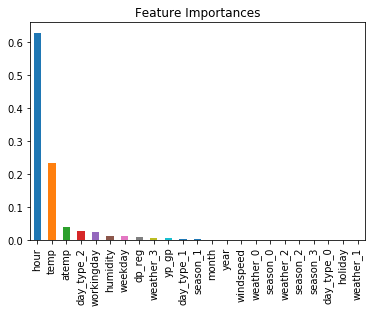

In [86]:
from sklearn.ensemble import RandomForestRegressor
target = ['casual']
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
classificationModel(alg5, train, test, predictors, target)
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarnin

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P


Model Report
RMSE : 0.6054
CV Score : Mean - 0.6258 | Std - 0.09973 | Min - 0.5055 | Max - 0.9102


C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


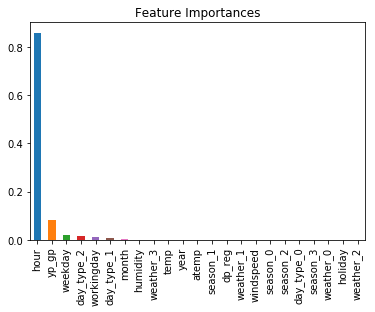

In [87]:
target = ['registered']
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
classificationModel(alg5, train, test, predictors, target)
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

In [93]:
test['casual'] = test['casual'].apply(lambda x:np.exp(x)-1)
test['registered'] = test['registered'].apply(lambda x:np.exp(x)-1)
test['count'] = test['casual'] + test['registered']
#test['count'] = test['count'].apply(lambda x:int(round(x)))

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [94]:
test[['datetime','count']].to_csv(os.path.join(folderPath,'random_forest_float.csv'),index=False)